
# Business Questions: Part1

    1. Focus on missed appointments

-------

# Logic: 

> Objective is to view two perspectives; Patients and Staff 
> - Important questions: 
>    1. How do missed appointments influences Staff workload? [Total appointments]

-------

# Assumptions:

- 1 appointment equals use of staff & infrastructure/resources
- Duplicates can exist 1 patient can have follow-up appointments
- Unknown value in both categorical columns, appointment_status and hcp_type, are unreliable observations

--------

# Risk
- 1 appointment equals 1 patients will assume there is more patients in current data set 
    - negative gives impression current patients number
    - positive gives the correct capacity since staff & infrastructure is utilize everytime an appointment is made



-------

# Outline:
    0. Setup
    1. Getting to know your data
    2. Cleaning data

--------

# Approach: 

- AR data set: Perform comparitive analysis by identify difference between Missed appointments and Attended appointments
    - Requires understanding of AR since it contains appointment status:
        1. Overview of big picture: Total appointments 
        2. Micro: Total appointments per appointment status type (i.e. Attended, Missed, Unknown)
        3. Contextualize Micro within Macro: Percentage of each status type
        4. Verify observation counts per status type: Can be misleading
        5. Use Average to compare status appointment type if observations are uneven
        6. Summarize finding using visualization


        

In [1]:
# Import jupyter
import jupyter_black

jupyter_black.load()

## 0. Setup

In [2]:
# Import modules/libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Absolute path per data source
ad_path = (
    "/Volumes/Macintosh HD - Data/tmp/LSE_DA201_Assignment_files/actual_duration.csv"
)
ar_path = "/Volumes/Macintosh HD - Data/tmp/LSE_DA201_Assignment_files/appointments_regional.csv"
nc_path = "/Volumes/Macintosh HD - Data/tmp/LSE_DA201_Assignment_files/national_categories.xlsx"

In [4]:
# Importation of data source csv files
ad = pd.read_csv(ad_path)
ar = pd.read_csv(ar_path)

# Importation of data source xlsx file
nc = pd.read_excel(nc_path)

## 1. Getting to know your data
- Scope & Summary:
    - Using ar since it contains status appointment and interest for client
    - Columns of interest; count_of_appointment only numeric, appointment_status, appointment_mode (characterists of possible distinction), time_between_book_and_appointment

In [5]:
# Back up
ar_profile = ar

# Verify head()
display(ar_profile.head())

# Verify no footnote of raw data or metadata
display(ar_profile.tail())

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17
596820,E54000050,2022-06,Unknown,Unknown,Unknown,Same Day,10


In [6]:
# Overview for numeric attributes
display(ar_profile.describe())

# Overview for categorical attributes
display(ar_profile.astype("category").describe())

# Overview of dtypes and missing values
display(ar_profile.info())

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
count,596821,596821,596821,596821,596821,596821,596821
unique,42,30,3,3,5,8,22807
top,E54000057,2020-03,Attended,Other Practice staff,Face-to-Face,Same Day,1
freq,54527,21350,232137,241557,180410,95502,55013


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


None

Comment:
- Majority of dtype are object which is default when python is unsure: need for data transformation via conversion of dtype
- count_of_appointments seems only numeric column available in AR data set: perfect candidate for outliers detection and possible consistency improvement
- Based on info() there seems to be no missing values, metadata indicates that values entitled 'Unknown' are missing values these are found in:
    - appointment_status (candidate for missing value)
    - hcp_type (candidate for missing value)

Insights:
- Mode per column: meaning most probable observation combination
1. E54000057
2. 2020-03
3. Attended
4. Other Practice staff
5. Face-to-Face
6. Same Day
7. 1


## 2. Cleaning data:
Purpose: to improve data quality

> Preparing deals with convenient formatting for analysis
>   - Transform data is another term for it 

> Cleaning deals with finding and fixing errors
>   - Outliers
>   - Duplicates
>   - Missing values


### 2.1 Transform data: conversion dtype
- demonstrate non-destructive cleaning 
    - avoids loss of original data
    - allows for experimentation
    - methods and functions available in python have limitations or constriction based dtype
> Transformation of data for analytical purposes to facilitate analysis based on approach or objective:
> 1. convertion of data types 
> 2. subsetting
> 3. pivot table
> 4. join, merge, concat


In [7]:
# Convert dtype - datetime

# Datatime
ar_profile["appointment_month_dt"] = pd.to_datetime(
    ar_profile["appointment_month"], format="%Y-%m"
)

# Verify conversion done
display(ar_profile["appointment_month_dt"].info())
display(ar_profile["appointment_month_dt"].head())

<class 'pandas.core.series.Series'>
RangeIndex: 596821 entries, 0 to 596820
Series name: appointment_month_dt
Non-Null Count   Dtype         
--------------   -----         
596821 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.6 MB


None

0   2020-01-01
1   2020-01-01
2   2020-01-01
3   2020-01-01
4   2020-01-01
Name: appointment_month_dt, dtype: datetime64[ns]

Comment:
- Useful for time series analysis; seasonal, trend, moving average

Insights:
- appointment_month: datetime
- four categorical or string: appointment_status, hcp_type, appointment_mode, time_between_book_and_appointment
- one numeric:count_of_appointments [already in proper format]

In [8]:
# Convert categorical attributes
# Non destructive cleaning - appointment_status
ar_profile["appointment_status_ct"] = ar_profile["appointment_status"].astype(
    "category"
)

# Non destructive cleaning - hcp_type
ar_profile["hcp_type_ct"] = ar_profile["hcp_type"].astype("category")

# Non destructive cleaning - appointment_mode
ar_profile["appointment_mode_ct"] = ar_profile["appointment_mode"].astype("category")

# Non destructive cleaning - appointment_mode
ar_profile["time_between_book_and_appointment_ct"] = ar_profile[
    "time_between_book_and_appointment"
].astype("category")

# View
ar_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   icb_ons_code                          596821 non-null  object        
 1   appointment_month                     596821 non-null  object        
 2   appointment_status                    596821 non-null  object        
 3   hcp_type                              596821 non-null  object        
 4   appointment_mode                      596821 non-null  object        
 5   time_between_book_and_appointment     596821 non-null  object        
 6   count_of_appointments                 596821 non-null  int64         
 7   appointment_month_dt                  596821 non-null  datetime64[ns]
 8   appointment_status_ct                 596821 non-null  category      
 9   hcp_type_ct                           596821 non-null  cate

Comment:
- Non-destructive cleaning technique allows for flexibility based on need by adding columns instead of replacing values, the original data remains intact (risk averse strategy avoids loss of data)

Risk:
- Non-destructive cleaning is time consuming and increase memory, not possible for big data sets



### 2.2 Outliers: improve consistency 
> Methods/approaches:
>   1. IQR technique
>   2. Z-score technique
>   3. Tukey's fence technique
>> ML methods:
>>  1. Isolation forest
>>  2. Local outler

------

**Steps**:
1. Boxplot - use for numeric columns 
2. Histgram - skewness and distribution 
    - Normal distribution use mean if imputation technique is used
    - Skewed distribution use median if imputation technique is used
3. Select appropriate approach based on analytical questions
    - Possible to do also an comparative analysis

#### 2.2.1 Overview of outliers

<Axes: ylabel='count_of_appointments'>

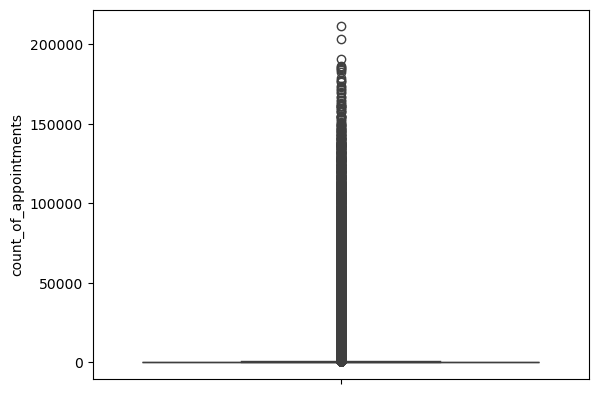

In [9]:
# Subset ar data set and create variable
ar_outliers = ar_profile.copy()

# Plot boxplot
sns.boxplot(data=ar_outliers["count_of_appointments"])

'Skewness of ar containing outliers: 11.52'

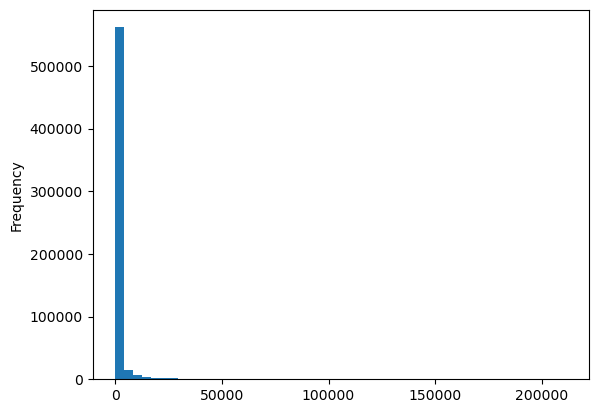

In [10]:
# Find out distribution if it skewed or not; indicates which imputation statistic will be used mean (not skewed) or median (skewed)
# Plot histogram - distribution
ar_outliers["count_of_appointments"].plot(kind="hist", bins=50)

# Skewness
ar_skewness = ar_outliers["count_of_appointments"].skew()
display(f"Skewness of ar containing outliers: {ar_skewness:.2f}")

Insight:
- Distribution skewed to the right
- Skewness value = 11.52
- If using impute method to deal with outlier better choice would be median since it not normally distributed

#### 2.2.2 Z-score technique

In [11]:
# Z-score method of identify outliers
ar_outliers["z_score"] = (
    np.abs(
        ar_outliers["count_of_appointments"]
        - ar_outliers["count_of_appointments"].mean()
    )
    / ar_outliers["count_of_appointments"].std()
)

# Subset of outliers only
outlier_z_score = ar_outliers[ar_outliers["z_score"] > 3]

# Summary and verification
display(
    f"The number of observation that are z_score outliers: {outlier_z_score.shape[0]:,}",
    f"The number of observations without outliers: {ar_profile.shape[0] - outlier_z_score.shape[0]:,}",
    f"The number of observations with outliers: {ar_profile.shape[0]:,}",
    f"Percentage of outliers using z-score: {(outlier_z_score.shape[0]/ar_profile.shape[0]):.2%}",
)

'The number of observation that are z_score outliers: 8,670'

'The number of observations without outliers: 588,151'

'The number of observations with outliers: 596,821'

'Percentage of outliers using z-score: 1.45%'

<Axes: ylabel='count_of_appointments'>

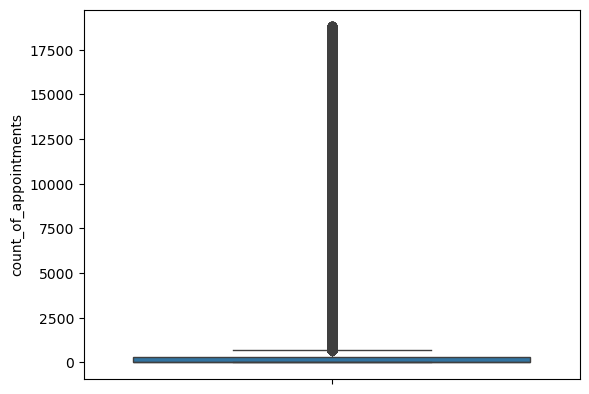

In [12]:
# Subset of without outliers
ar_without_outlier_z = ar_outliers[ar_outliers["z_score"] <= 3]

# Check
ar_without_outlier_z.shape[0]

# Plot boxplot: z-score
sns.boxplot(data=ar_without_outlier_z["count_of_appointments"])

<Axes: ylabel='Frequency'>

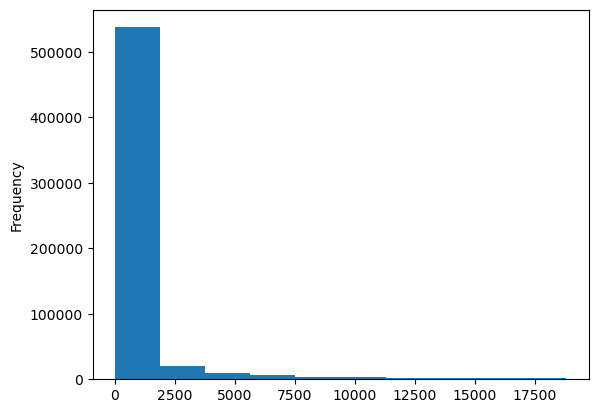

In [13]:
# Plot histgram: z-score
ar_without_outlier_z["count_of_appointments"].plot(kind="hist")

#### 2.2.3 IQR technique

In [14]:
# IQR technique
# Calculate Q1, Q3, and IQR
Q1 = ar_outliers["count_of_appointments"].quantile(0.25)
Q3 = ar_outliers["count_of_appointments"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask for outliers
outlier_mask = (ar_outliers["count_of_appointments"] < lower_bound) | (
    ar_outliers["count_of_appointments"] > upper_bound
)

# Apply the mask to filter outliers
outliers_iqr = ar_outliers[outlier_mask]

# Subset without outlier using iqr method
ar_without_outlier_iqr = ar_outliers[~outlier_mask]

# Summary & Overview
display(ar_without_outlier_iqr.shape[0])

print(f"Original ar_outliers: {ar_outliers.shape[0]:,}")
print(f"\nNumber of observation that are outliers using iqr: {outliers_iqr.shape[0]:,}")
print(
    f"\nNumber of observation that without outliers using iqr: {ar_without_outlier_iqr.shape[0]:,}"
)
print(
    f"\nOutlier percentage using IQR: {(outliers_iqr.shape[0]/ar_outliers.shape[0]):.2%}"
)

499473

Original ar_outliers: 596,821

Number of observation that are outliers using iqr: 97,348

Number of observation that without outliers using iqr: 499,473

Outlier percentage using IQR: 16.31%


<Axes: ylabel='count_of_appointments'>

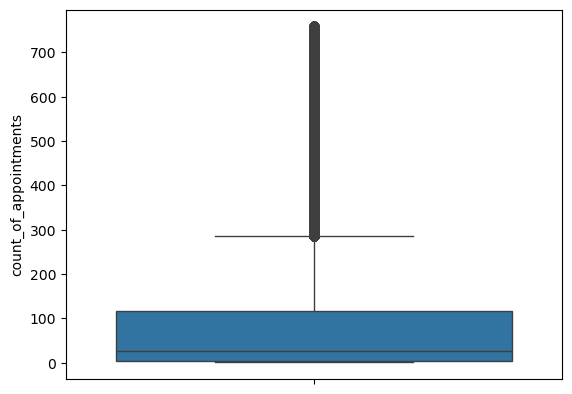

In [15]:
# Plot boxplot
sns.boxplot(data=ar_without_outlier_iqr["count_of_appointments"])

<Axes: ylabel='Frequency'>

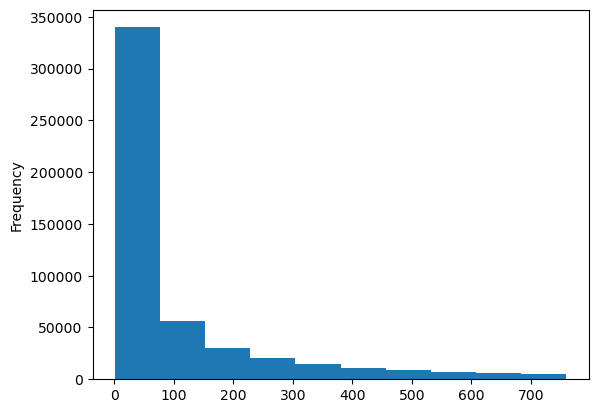

In [16]:
# Histogram
ar_without_outlier_iqr["count_of_appointments"].plot(kind="hist")

#### 2.2.4 Compare outlier techniques: IQR vs Z-score

In [17]:
# Compare outlier techniques iqr vs z-score
display(ar_without_outlier_z["count_of_appointments"].describe())
display(ar_without_outlier_iqr["count_of_appointments"].describe())

count    588151.000000
mean        681.655973
std        2080.072633
min           1.000000
25%           6.000000
50%          44.000000
75%         279.000000
max       18813.000000
Name: count_of_appointments, dtype: float64

count    499473.000000
mean         97.705724
std         154.644489
min           1.000000
25%           5.000000
50%          26.000000
75%         117.000000
max         759.000000
Name: count_of_appointments, dtype: float64

Insights:
- IQR technique provides more standardized output by eliminating 16.31% observation
- Z-score is further from normal distribution because it eliminates 1.41% observation 

Comment:
- to select which is best suited we should look at the missed appointments


In [22]:
# Comparing outliers techniques - how it effects objective of analytical questions
# View iqr subset without outliers
display(ar_without_outlier_iqr["appointment_status"].value_counts())

# View z-score subset without outliers
display(ar_without_outlier_z["appointment_status"].value_counts())

# View original data set ar with outliers
display(ar_profile["appointment_status"].value_counts())

appointment_status
Unknown     190602
Attended    156074
DNA         152797
Name: count, dtype: int64

appointment_status
Attended    223467
Unknown     201324
DNA         163360
Name: count, dtype: int64

appointment_status
Attended    232137
Unknown     201324
DNA         163360
Name: count, dtype: int64

Insight:
- iqr format provides a more equal representation of type, which would be great if it was not for unknown which is a null
- z-score eliminates only the most extreme value but it only effected attended values, the remainder type remain unchanged

Comment:
- 2 issues with outlier solution: 
    1. skewness both remained right skewed distribution
    2. amount lost of observations
- Main concerns is selection is based on objective and objective is missed appointments 
    - comparative analysis to find the most suitable in this case


### 2.3 Duplicates 

In [23]:
# Duplicates check - entire data set AR
display(ar_profile.duplicated().value_counts())
display(ar_profile.duplicated().value_counts(normalize=True))

# Subset duplicates and verify it matches
display(ar_profile[ar_profile.duplicated() == True].shape[0])

# View subset
display(ar_profile[ar_profile.duplicated() == True].describe())

# Compared to orginal
ar_profile.describe()

False    575217
True      21604
Name: count, dtype: int64

False    0.963802
True     0.036198
Name: proportion, dtype: float64

21604

,count_of_appointments,appointment_month_dt
count,21604.000000,21604
mean,12.718293,2021-03-16 11:19:40.448065280
min,1.000000,2020-01-01 00:00:00
25%,1.000000,2020-08-01 00:00:00
50%,2.000000,2021-03-01 00:00:00
75%,6.000000,2021-11-01 00:00:00
max,9737.000000,2022-06-01 00:00:00
std,103.259831,NaN


,count_of_appointments,appointment_month_dt
count,596821.000000,596821
mean,1244.601857,2021-03-19 11:31:17.489565696
min,1.000000,2020-01-01 00:00:00
25%,7.000000,2020-08-01 00:00:00
50%,47.000000,2021-04-01 00:00:00
75%,308.000000,2021-11-01 00:00:00
max,211265.000000,2022-06-01 00:00:00
std,5856.887042,NaN


Insights:
- 3.6% of are duplicate values
- duplicate values have a small spread, and their weighted average is 12.7 appointments, which makes sense since the majority of values are withing 1 to 6 appointments count range


In [24]:
# Is there a location that produce more duplicates than other?

# Subset duplicates of ar
ar_duplicates = ar_profile[ar_profile.duplicated() == True]

# Groupby icb_ons_code - location with the highest total appointments duplicates
# Sum
display(
    ar_duplicates.groupby("icb_ons_code")["count_of_appointments"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Groupby icb_ons_code - location with the highest number appointment duplicates
# Count
display(
    ar_duplicates.groupby("icb_ons_code")["count_of_appointments"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)

icb_ons_code
E54000057    76630
E54000008    35677
E54000048    35126
E54000050    29414
E54000051    19398
E54000026    18649
E54000010    16423
E54000054    15367
E54000061     8298
E54000023     6450
Name: count_of_appointments, dtype: int64

icb_ons_code
E54000057    4552
E54000008    3369
E54000048    2883
E54000050    2849
E54000010    1670
E54000051    1638
E54000054     982
E54000026     857
E54000061     771
E54000044     506
Name: count_of_appointments, dtype: int64

In [25]:
# Create variable and explore
ar_duplicates = ar_profile[ar_profile.duplicated() == True]

# View duplicates
ar_duplicates.value_counts().sort_values(ascending=False)

icb_ons_code  appointment_month  appointment_status  hcp_type  appointment_mode  time_between_book_and_appointment  count_of_appointments  appointment_month_dt  appointment_status_ct  hcp_type_ct  appointment_mode_ct  time_between_book_and_appointment_ct
E54000008     2021-07            DNA                 GP        Home Visit        2 to 7 Days                        1                      2021-07-01            DNA                    GP           Home Visit           2 to 7 Days                             6
E54000057     2021-12            DNA                 GP        Home Visit        8  to 14 Days                      1                      2021-12-01            DNA                    GP           Home Visit           8  to 14 Days                           6
              2020-10            Unknown             GP        Home Visit        15  to 21 Days                     1                      2020-10-01            Unknown                GP           Home Visit           15  to 

In [26]:
# Subset ar_duplicates contains 21604
# Hypothesis is that most of it comes from unknown value either in appointment_status or hcp_type

# Verify appointment status
display(ar_duplicates["appointment_status"].value_counts())
display(ar_duplicates["appointment_status"].value_counts(normalize=True))

# Verify hcp_type
display(ar_duplicates["hcp_type"].value_counts())
display(ar_duplicates["hcp_type"].value_counts(normalize=True))

# Total unknown value contained within duplicates data set
display(f"Total number of values with Unknown as value: {7950 + 6270}")

appointment_status
Unknown     7950
DNA         7812
Attended    5842
Name: count, dtype: int64

appointment_status
Unknown     0.367987
DNA         0.361600
Attended    0.270413
Name: proportion, dtype: float64

hcp_type
GP                      8208
Other Practice staff    7126
Unknown                 6270
Name: count, dtype: int64

hcp_type
GP                      0.379930
Other Practice staff    0.329846
Unknown                 0.290224
Name: proportion, dtype: float64

'Total number of values with Unknown as value: 14220'

Insights:
- Unknown is the largest observation demography in duplicates data set, followed by DNA aka missed appointments


In [27]:
# Observation appointment_status
display(ar_profile["appointment_status"].value_counts())
display(ar_profile["appointment_status"].value_counts(normalize=True))

# Observation hcp_type
display(ar_profile["hcp_type"].value_counts())
display(ar_profile["hcp_type"].value_counts(normalize=True))

appointment_status
Attended    232137
Unknown     201324
DNA         163360
Name: count, dtype: int64

appointment_status
Attended    0.388956
Unknown     0.337327
DNA         0.273717
Name: proportion, dtype: float64

hcp_type
Other Practice staff    241557
GP                      226036
Unknown                 129228
Name: count, dtype: int64

hcp_type
Other Practice staff    0.404739
GP                      0.378733
Unknown                 0.216527
Name: proportion, dtype: float64

In [28]:
# Removing duplicates that contains unknown in both hcp_type and appointment_status
# Too many part attributes missing and unreliable quality of data

# Subset orginal
ar_poor_obs = ar_profile[
    (ar_profile["hcp_type_ct"].str.contains("Unknown"))
    & (ar_profile["appointment_status_ct"].str.contains("Unknown"))
]

# Subset without unreliable observation
ar_cl = ar_profile[
    ~(ar_profile["hcp_type_ct"].str.contains("Unknown"))
    & ~(ar_profile["appointment_status_ct"].str.contains("Unknown"))
]

# Check
display(
    f"Number of unreliable observations: {ar_poor_obs.shape[0]:,}",
    f"Number of observations from original data set: {ar_profile.shape[0]:,}",
    f"Percentage of unreliable observations: {ar_poor_obs.shape[0]/ar_profile.shape[0]:.2%}",
    f"Number of observation remaining: {ar_cl.shape[0]:,}",
    f"Number of duplicates from original data set: {ar_profile.duplicated().sum():,}",
    f"Number of duplicates reliable data set: {ar_cl.duplicated().sum():,}",
    f"Percentage of duplicate reduction: {1-ar_cl.duplicated().sum() / ar_profile.duplicated().sum():.2%}",
    f"Total missed appointments of original: {ar_profile.loc[ar_profile['appointment_status_ct']== "DNA", 'count_of_appointments'].sum():,}",
    f"Total missed appointments of reliable data set: {ar_cl.loc[ar_cl['appointment_status_ct']== "DNA", 'count_of_appointments'].sum():,}",
    f"Percentage reduction of missed appointments: {1- ar_cl.loc[ar_cl['appointment_status_ct']== "DNA", 'count_of_appointments'].sum() / ar_profile.loc[ar_profile['appointment_status_ct']== "DNA", 'count_of_appointments'].sum():.2%}",
    f"Total attended appointments of original: {ar_profile.loc[ar_profile['appointment_status_ct']== "Attended", 'count_of_appointments'].sum():,}",
    f"Total attended appointments of reliable data set: {ar_cl.loc[ar_cl['appointment_status_ct']== "Attended", 'count_of_appointments'].sum():,}",
    f"Percentage reduction of attended appointments: {1- ar_cl.loc[ar_cl['appointment_status_ct']== "Attended", 'count_of_appointments'].sum() / ar_profile.loc[ar_profile['appointment_status_ct']== "Attended", 'count_of_appointments'].sum():.2%}",
)

'Number of unreliable observations: 46,232'

'Number of observations from original data set: 596,821'

'Percentage of unreliable observations: 7.75%'

'Number of observation remaining: 312,501'

'Number of duplicates from original data set: 21,604'

'Number of duplicates reliable data set: 9,763'

'Percentage of duplicate reduction: 54.81%'

'Total missed appointments of original: 30,911,233'

'Total missed appointments of reliable data set: 30,258,270'

'Percentage reduction of missed appointments: 2.11%'

'Total attended appointments of original: 677,755,876'

'Total attended appointments of reliable data set: 656,976,582'

'Percentage reduction of attended appointments: 3.07%'

Comment:
- "Garbage in garbage out" high quality data is needed for accurate insights and analysis
- Duplicates remain since an appointment can represent the same patient, and when looking at capacity both staff and resources are utilized when appointment is made (occupancy)


Insights:
- 7.75% of observations are unreliable observations
- 54.81% reduction of duplicates observations (all missing values from entire data)
- Unknown value exist only as duplicate and if value is present in categorical columns; appointment_status & hcp_type
- Total appointments was reduced by 5.18%, impact of unknown value  

In [29]:
# Check if Unknown value remain within appointment_status
display(ar_cl["appointment_status_ct"].value_counts())

# Check if Unknown value remain within hcp_type
display(ar_cl["hcp_type_ct"].value_counts())

appointment_status_ct
Attended    178720
DNA         133781
Unknown          0
Name: count, dtype: int64

hcp_type_ct
Other Practice staff    161845
GP                      150656
Unknown                      0
Name: count, dtype: int64

In [30]:
# What was the impact of unknown in terms of count_of_appointments
display(
    f'Total appointments with unknown categorical value: {ar_profile.loc[ar_profile["appointment_status_ct"].str.contains("Unknown"),"count_of_appointments"].sum():,}'
)

# What portions of total does it have
display(
    f'Total appointments of entire data set AR: {ar_profile["count_of_appointments"].sum():,}'
)

# Represents 4.6% total appointments
display(
    f'Appointment Percentage containing Unknown as a values: {ar_profile.loc[ar_profile["appointment_status_ct"].str.contains("Unknown"),"count_of_appointments"].sum()/ ar_profile["count_of_appointments"].sum():.2%}'
)

'Total appointments with unknown categorical value: 34,137,416'

'Total appointments of entire data set AR: 742,804,525'

'Appointment Percentage containing Unknown as a values: 4.60%'

### 2.4 Missing value:
Metadata:
- Indicated that 'Unknown' value represent missing value
 
Insight:
- Only existed if it contained 'Unknown' as a value
- 'Unknown' value is MCAR because was present in two columns simultaneously  


In [31]:
# Number of null values
ar_profile.isnull().sum()

icb_ons_code                            0
appointment_month                       0
appointment_status                      0
hcp_type                                0
appointment_mode                        0
time_between_book_and_appointment       0
count_of_appointments                   0
appointment_month_dt                    0
appointment_status_ct                   0
hcp_type_ct                             0
appointment_mode_ct                     0
time_between_book_and_appointment_ct    0
dtype: int64

In [32]:
# How many null values exist within the original data set?
# Back up
ar2 = ar_profile.copy()

# Check unique values for appointment status
display(ar2["appointment_status"].unique())

# Replace Unknown with null value
ar2["appointment_status_cl"] = ar2["appointment_status"].replace("Unknown", np.nan)

# Count
display(ar2.isnull().sum())

# Shape and check
ar2.shape

array(['Attended', 'DNA', 'Unknown'], dtype=object)

icb_ons_code                                 0
appointment_month                            0
appointment_status                           0
hcp_type                                     0
appointment_mode                             0
time_between_book_and_appointment            0
count_of_appointments                        0
appointment_month_dt                         0
appointment_status_ct                        0
hcp_type_ct                                  0
appointment_mode_ct                          0
time_between_book_and_appointment_ct         0
appointment_status_cl                   201324
dtype: int64

(596821, 13)

In [33]:
# Check unique values for appointment status
display(ar2["hcp_type"].unique())

# Replace Unknown with null value
ar2["hcp_type_cl"] = ar2["hcp_type"].replace("Unknown", np.nan)

# Count
display(ar2.isnull().sum())

array(['GP', 'Other Practice staff', 'Unknown'], dtype=object)

icb_ons_code                                 0
appointment_month                            0
appointment_status                           0
hcp_type                                     0
appointment_mode                             0
time_between_book_and_appointment            0
count_of_appointments                        0
appointment_month_dt                         0
appointment_status_ct                        0
hcp_type_ct                                  0
appointment_mode_ct                          0
time_between_book_and_appointment_ct         0
appointment_status_cl                   201324
hcp_type_cl                             129228
dtype: int64

In [34]:
# How many null value in clean duplicate data set
# Number of null values in ar_cl
display(ar_cl["hcp_type_ct"].value_counts())
display(ar_cl["appointment_status_ct"].value_counts())

hcp_type_ct
Other Practice staff    161845
GP                      150656
Unknown                      0
Name: count, dtype: int64

appointment_status_ct
Attended    178720
DNA         133781
Unknown          0
Name: count, dtype: int64

----------------